# Packages and Data Importing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from scipy import sparse,stats
import xgboost as xgb
from sklearn import preprocessing, pipeline, metrics
import time

## Data Importing

In [5]:
properties = pd.read_csv('data/properties_2016.csv')
# pd.read_csv(sio, dtype={"user_id": int, "username": object})

C:\Users\Wanli\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
train = pd.read_csv("data/train_2016_v2.csv")

In [7]:
properties.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [8]:
train.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [9]:
print(properties.dtypes)

parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                        float64


In [10]:
print(train.dtypes)

parcelid             int64
logerror           float64
transactiondate     object
dtype: object


## Join train Data Frame with properties Data Frame

In [11]:
train_df = train.merge(properties, how='left', on='parcelid')

# EDA - Exploratory Data Analysis

## Target: Logerror - Histogram including all data

Text(0.5,0,'logerror')

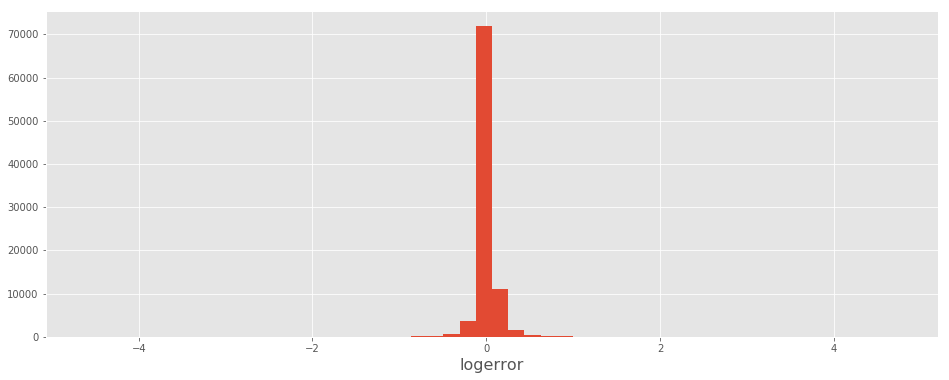

In [12]:
plt.figure(figsize = (16, 6))
plt.hist(train_df.logerror, bins = 50)
plt.xlabel('logerror', fontsize = 16)

##  Target : Logerror - Histogram (1st-99th percentile data)

Text(0.5,0,'logerror')

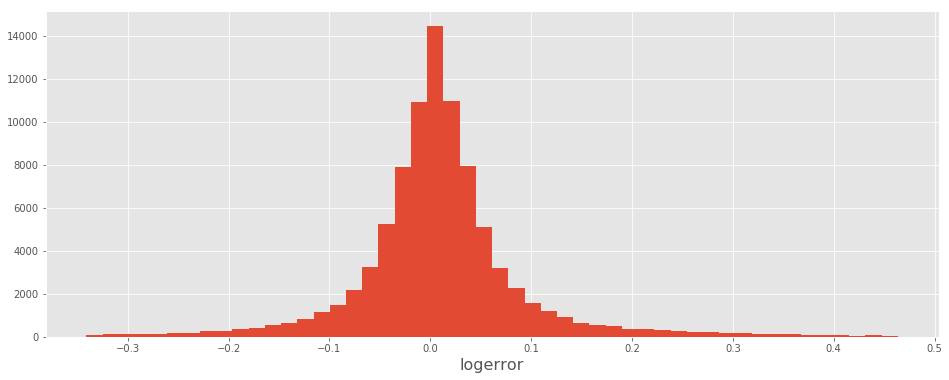

In [13]:
upperlimit = np.percentile(train_df.logerror, 99)
lowerlimit = np.percentile(train_df.logerror, 1)

plt.figure(figsize = (16, 6))
plt.hist(train_df.query('logerror > {} and logerror < {}'.format(lowerlimit, upperlimit)).logerror, 
         bins = 50)
plt.xlabel('logerror', fontsize = 16)

## Key feature: Tax Value - taxvaluedollarcnt - Histogram

Text(0.5,0,'taxvaluedollarcnt')

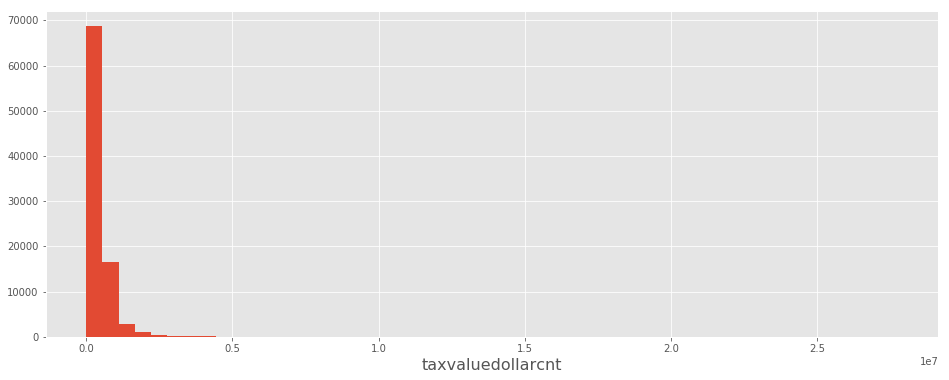

In [14]:
# when there is NaN in your column, use query to remove NaN for data display 
plt.figure(figsize = (16, 6))
plt.hist(train_df.query('taxvaluedollarcnt == taxvaluedollarcnt').taxvaluedollarcnt, 
         bins = 50)
#plt.hist(train_df.taxvaluedollarcnt, bins = 50)
plt.xlabel('taxvaluedollarcnt', fontsize = 16)

## Key feature: Tax Value - taxvaluedollarcnt - Histogram (1st-99th percentile)

Text(0.5,0,'taxvaluedollarcnt')

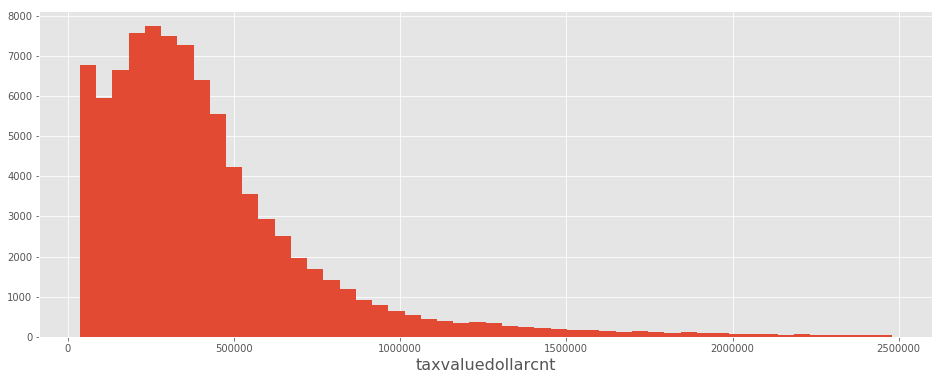

In [15]:
upperlimit = np.percentile(train_df.query('taxvaluedollarcnt == taxvaluedollarcnt').taxvaluedollarcnt.values, 99)
lowerlimit = np.percentile(train_df.query('taxvaluedollarcnt == taxvaluedollarcnt').taxvaluedollarcnt.values, 1)

plt.figure(figsize = (16, 6))
plt.hist(train_df.query('taxvaluedollarcnt > {} and taxvaluedollarcnt < {}'.format(lowerlimit, upperlimit)).taxvaluedollarcnt, 
         bins = 50)
plt.xlabel('taxvaluedollarcnt', fontsize = 16)

## Key Feature: Lot size - lotsizesquarefeet - Histogram

Text(0.5,0,'lotsizesquarefeet')

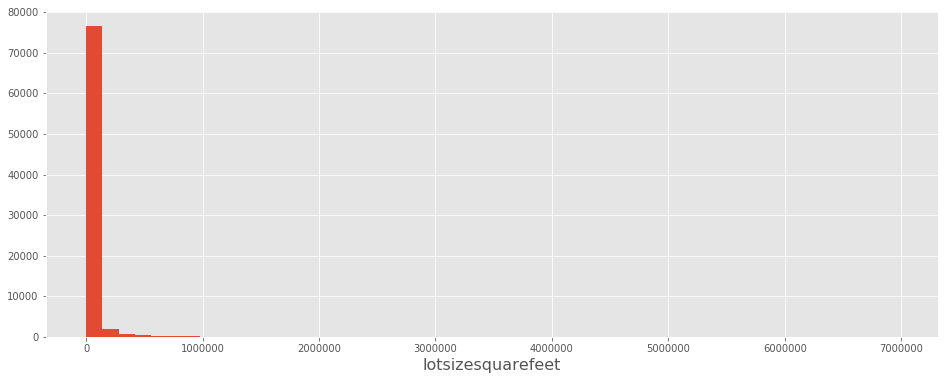

In [16]:
plt.figure(figsize = (16, 6))
plt.hist(train_df.query('lotsizesquarefeet == lotsizesquarefeet').lotsizesquarefeet, 
         bins = 50)
plt.xlabel('lotsizesquarefeet', fontsize = 16)

## Key Feature: Lot size - lotsizesquarefeet - Histogram (< 30,000 sqft)

Text(0.5,0,'lotsizesquarefeet')

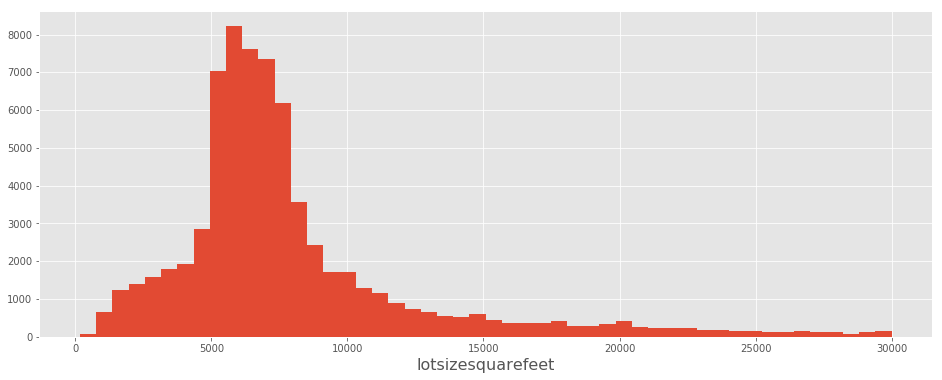

In [17]:
plt.figure(figsize = (16, 6))
plt.hist(train_df.query('lotsizesquarefeet > 0 and lotsizesquarefeet < 30000').lotsizesquarefeet, 
         bins = 50)
plt.xlabel('lotsizesquarefeet', fontsize = 16)

## Key Feature: Built Year - yearbuilt

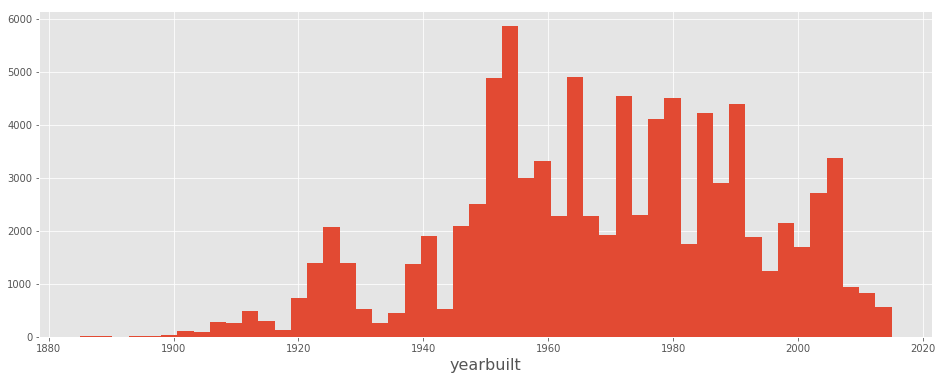

In [18]:
plt.figure(figsize = (16, 6))
plt.hist(train_df.query('yearbuilt == yearbuilt').yearbuilt, 
         bins = 50)
plt.xlabel('yearbuilt', fontsize = 16)
plt.show()

## Multivariate EDA: logerror vs. tax value

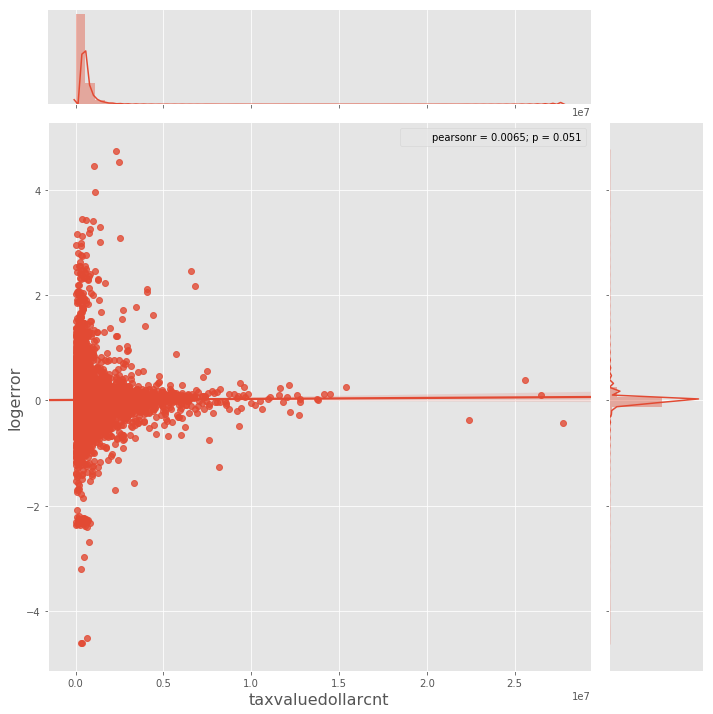

In [19]:
plt.figure(figsize = (16, 16))
sns.jointplot('taxvaluedollarcnt', 
              'logerror', 
              train_df.query('taxvaluedollarcnt==taxvaluedollarcnt'), 
              size = 10, 
              kind='reg', )
plt.xlabel('taxvaluedollarcnt', fontsize = 16)
plt.ylabel('logerror', fontsize = 16)
plt.show()

There is no clear relation between logerror and taxvaluedollarcnt

## Add abs_logerror as the new feature

In [20]:
train_df['abs_logerror'] = train_df.logerror.abs()

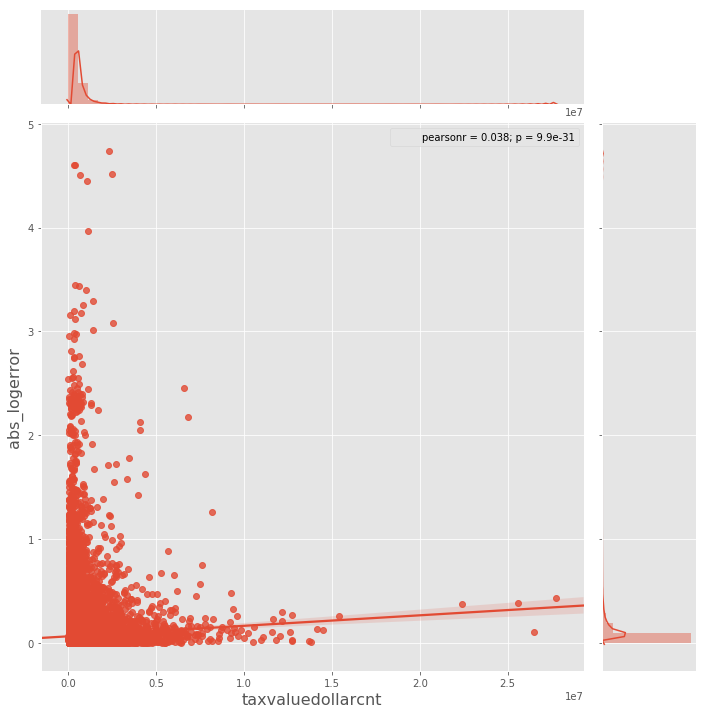

In [21]:
plt.figure(figsize = (16, 16))
sns.jointplot('taxvaluedollarcnt', 
              'abs_logerror', 
              train_df.query('taxvaluedollarcnt == taxvaluedollarcnt'), 
              size = 10, 
              kind = 'reg')
plt.xlabel('taxvaluedollarcnt', fontsize = 16)
plt.ylabel('abs_logerror', fontsize = 16)
plt.show()

for high value house, taxvaluedollarcnt could help a bit to predict logerror

matplotlib scatter plot with alpha 

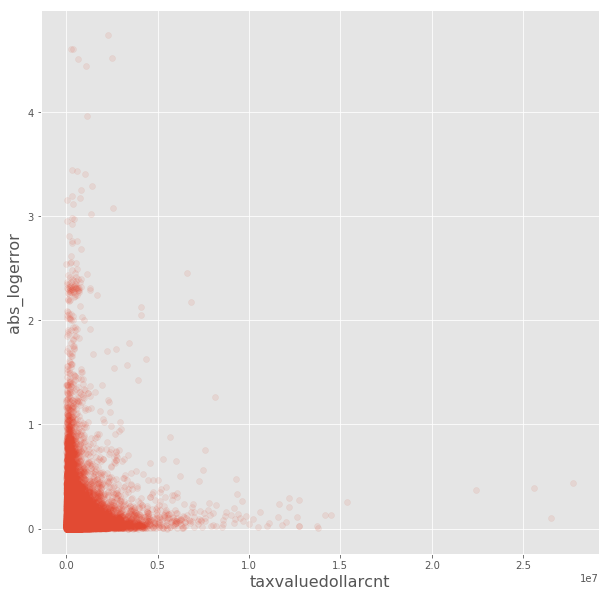

In [22]:
plt.figure(figsize = (10, 10))
plt.scatter(train_df.taxvaluedollarcnt, 
            train_df.abs_logerror, 
            alpha=0.1)
plt.xlabel('taxvaluedollarcnt', fontsize = 16)
plt.ylabel('abs_logerror', fontsize = 16)
plt.show()

zoom into detail

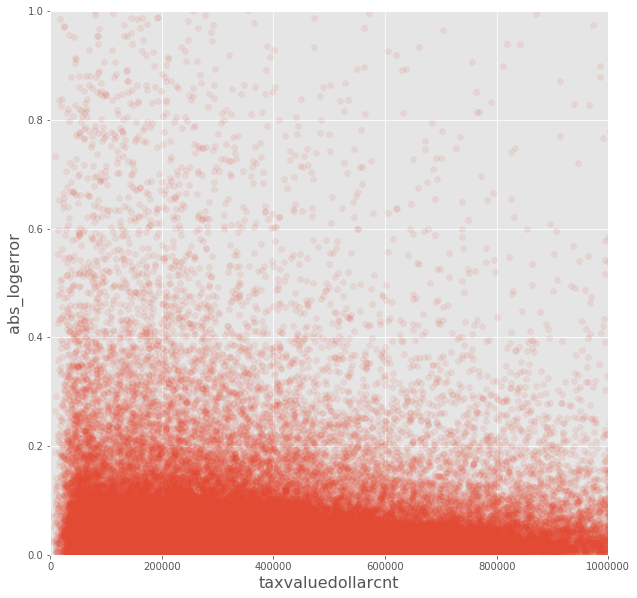

In [23]:
plt.figure(figsize = (10, 10))
plt.scatter(train_df.taxvaluedollarcnt, 
            train_df.abs_logerror, 
            alpha=0.1)
plt.xlabel('taxvaluedollarcnt', fontsize = 16)
plt.ylabel('abs_logerror', fontsize = 16)
plt.xlim(0, 1000000)
plt.ylim(0, 1)
plt.show()

## Multivariate EDA: logerror vs. built year

### simple cross-plot between abs_logerror and built year

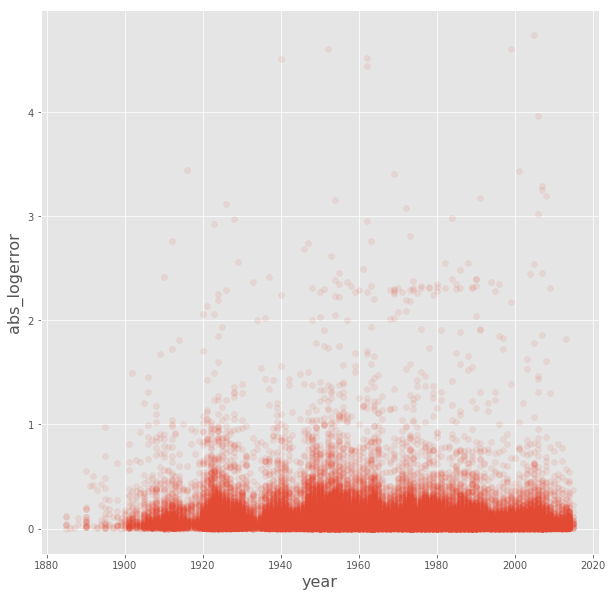

In [24]:
plt.figure(figsize = (10, 10))
plt.scatter(train_df.yearbuilt, 
            train_df.abs_logerror, 
            alpha=0.1)
plt.xlabel('year', fontsize = 16)
plt.ylabel('abs_logerror', fontsize = 16)
plt.show()

### similar cross-plot with seaborn

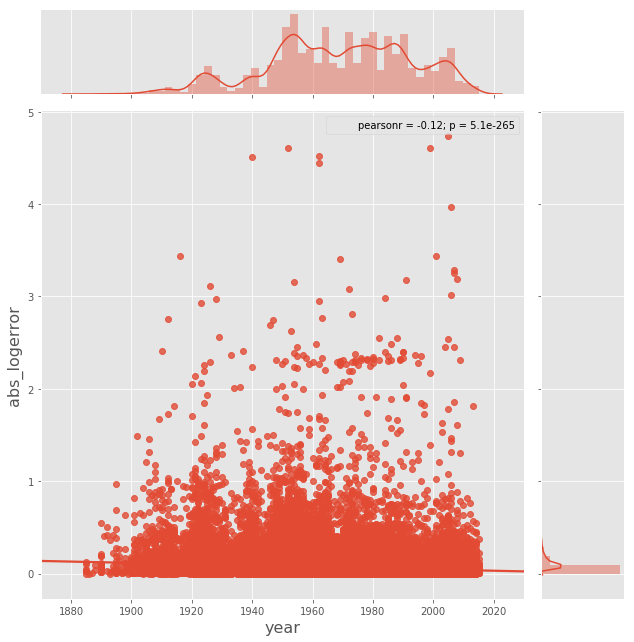

In [25]:
# plt.figure(figsize = (16, 6))
sns.jointplot('yearbuilt', 
              'abs_logerror', 
              train_df.query('yearbuilt==yearbuilt'), 
              size = 9, 
              kind='reg')
plt.xlabel('year', fontsize = 16)
plt.ylabel('abs_logerror', fontsize = 16)
plt.show()

## Aggregate abs_logerror regarding built year

In [26]:
train_df_logerrorAggYear = train_df.groupby('yearbuilt').abs_logerror.mean().reset_index()

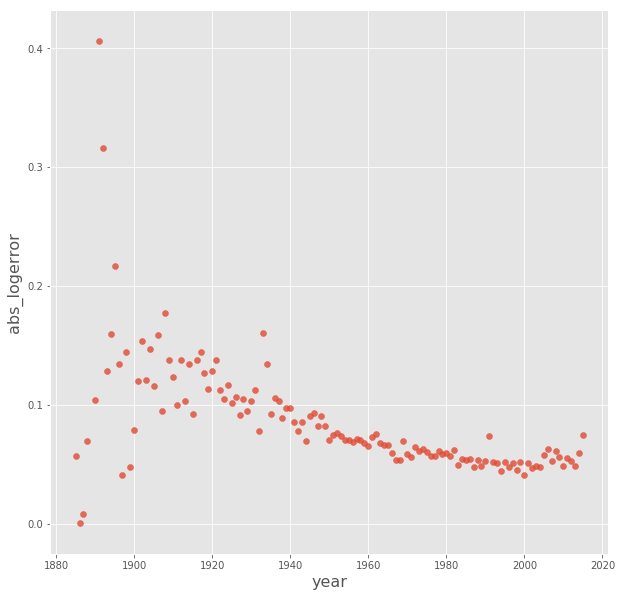

In [27]:
plt.figure(figsize = (10, 10))
plt.scatter(train_df_logerrorAggYear.yearbuilt, 
            train_df_logerrorAggYear.abs_logerror,
           alpha = 0.8)
plt.xlabel('year', fontsize = 16)
plt.ylabel('abs_logerror', fontsize = 16)
plt.show()

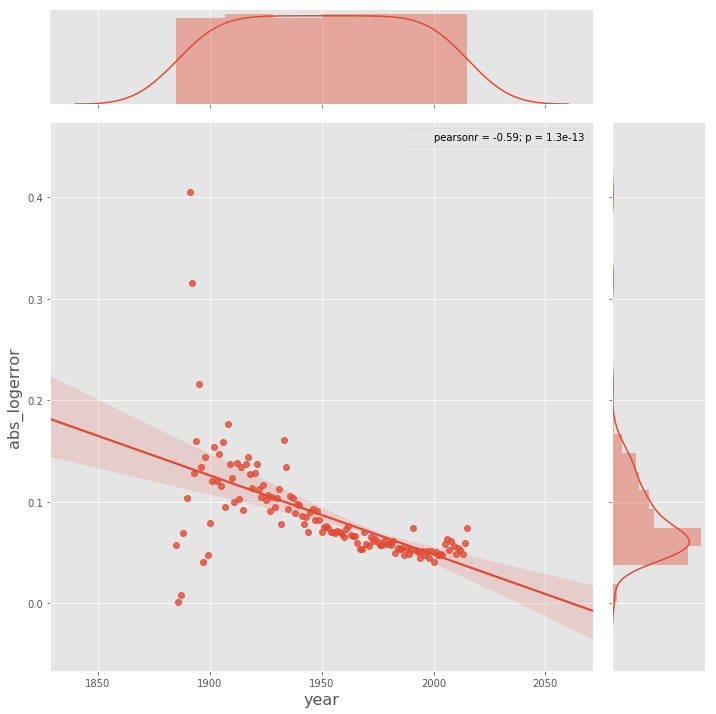

In [28]:
sns.jointplot('yearbuilt', 
              'abs_logerror', 
              train_df_logerrorAggYear, 
              size = 10, 
              kind = 'reg')
plt.xlabel('year', fontsize = 16)
plt.ylabel('abs_logerror', fontsize = 16)
plt.show()

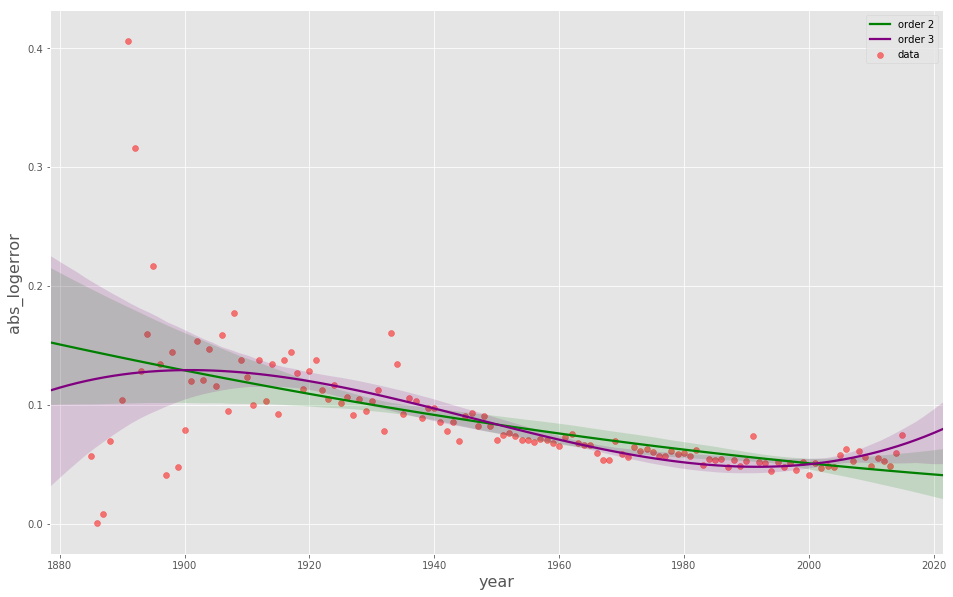

In [29]:
plt.figure(figsize = (16, 10))

plt.scatter(train_df_logerrorAggYear.yearbuilt, 
            train_df_logerrorAggYear.abs_logerror, 
            label='data', 
            color='red', 
            marker='o', 
            alpha=.5)
# sns.regplot(train_df_logerrorAggYear.yearbuilt, 
#             train_df_logerrorAggYear.abs_logerror, 
#             scatter=None, 
#             color='blue', 
#             label='order 1')
sns.regplot(train_df_logerrorAggYear.yearbuilt, 
            train_df_logerrorAggYear.abs_logerror, 
            scatter=None, 
            order=2, 
            color='green', 
            label='order 2')
sns.regplot(train_df_logerrorAggYear.yearbuilt, 
            train_df_logerrorAggYear.abs_logerror, 
            scatter=None, 
            order=3, 
            color='purple', 
            label='order 3')

plt.xlabel('year', fontsize = 16)
plt.ylabel('abs_logerror', fontsize = 16)

plt.legend(loc='upper right')
plt.show()

new houses are easier to predict, it makes sense

## Parse Transaction Year and Transaction Month from transactiondate

In [30]:
train_df_copy = train_df.copy()
train_df_copy['transactiondate'] = pd.to_datetime(train_df_copy['transactiondate'])

In [31]:
train_df_copy['transactionyear'] = train_df_copy['transactiondate'].dt.year
train_df_copy['transactionmonth'] = train_df_copy['transactiondate'].dt.month

### Aggregate abs_logerror regarding Transaction Year

In [32]:
train_df_logerrorTransactionyear = train_df_copy.groupby('transactionyear').abs_logerror.mean().reset_index()

In [33]:
train_df_logerrorTransactionyear

,transactionyear,abs_logerror
0,2016,0.068447


### Aggregate abs_logerror regarding Transaction Month

In [34]:
train_df_logerrorTransactionmonth = train_df_copy.groupby('transactionmonth').abs_logerror.mean().reset_index()

In [35]:
train_df_logerrorTransactionmonth

,transactionmonth,abs_logerror
0,1,0.072695
1,2,0.077434
2,3,0.072044
3,4,0.069972
4,5,0.066241
5,6,0.066158
6,7,0.065044
7,8,0.066104
8,9,0.067279
9,10,0.064746


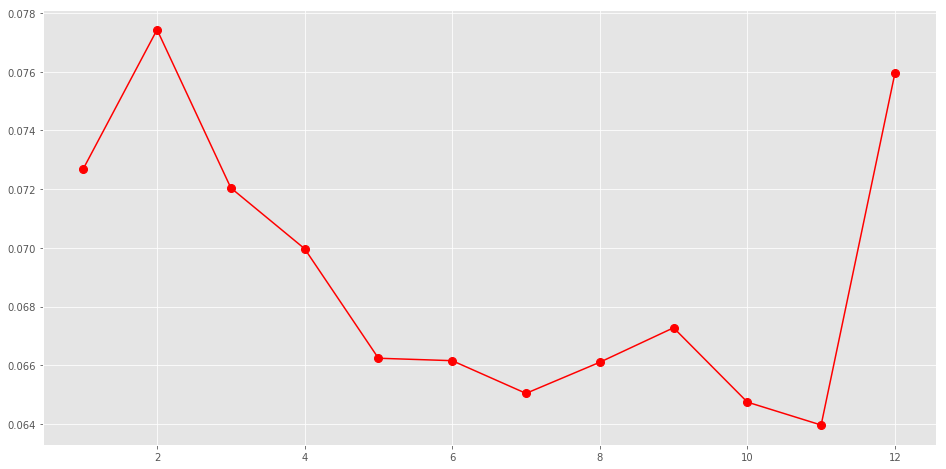

In [36]:
plt.figure(figsize = (16, 8))

plt.plot(train_df_logerrorTransactionmonth.transactionmonth, 
         train_df_logerrorTransactionmonth.abs_logerror, 
         color='red', 
         marker='o',
         markersize=8)
plt.show()

## Multivariate EDA:  Tax Amount vs. Lot Size

Text(63.125,0.5,'Tax Amount')

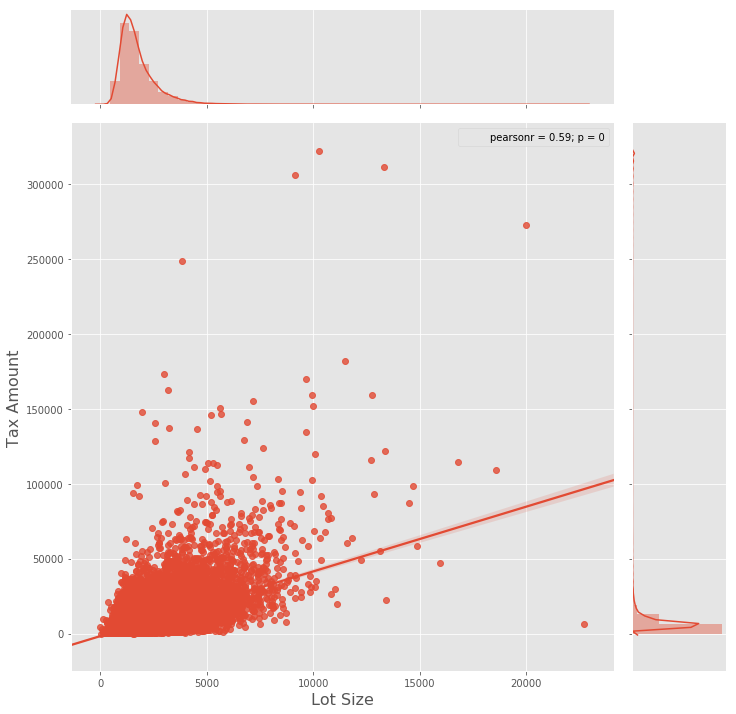

In [37]:
sns.jointplot('calculatedfinishedsquarefeet',
              'taxamount',
              train_df,
              size=10,
              kind='reg')
plt.xlabel('Lot Size', fontsize = 16)
plt.ylabel('Tax Amount', fontsize = 16)

## Multivariate EDA: Tax Amount vs. Tax Value

Text(63.125,0.5,'Tax Amount')

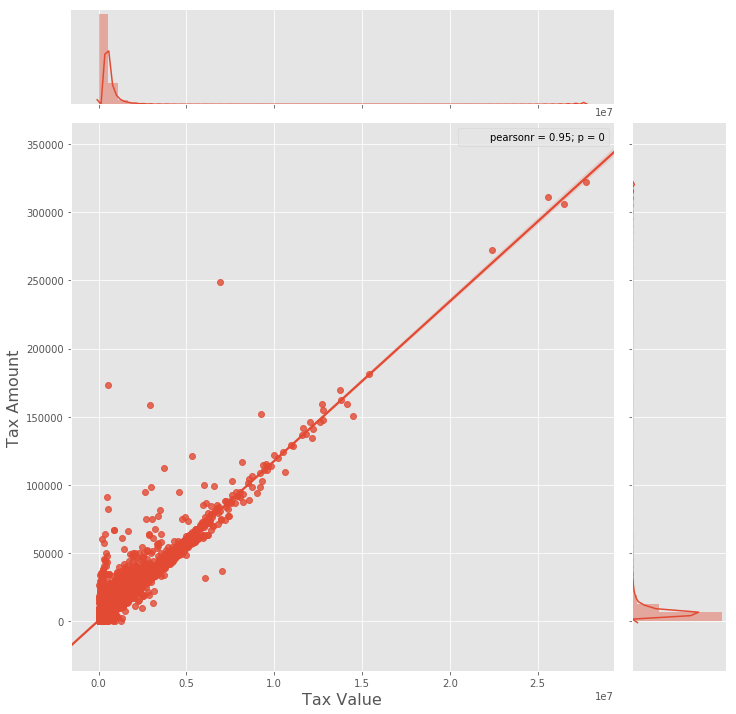

In [38]:
sns.jointplot('taxvaluedollarcnt',
              'taxamount',
              train_df,
              size=10,
              kind='reg')
plt.xlabel('Tax Value', fontsize = 16)
plt.ylabel('Tax Amount', fontsize = 16)

## Multivariate EDA: logerror vs. architecturalstyletypeid

Text(0,0.5,'Logerror')

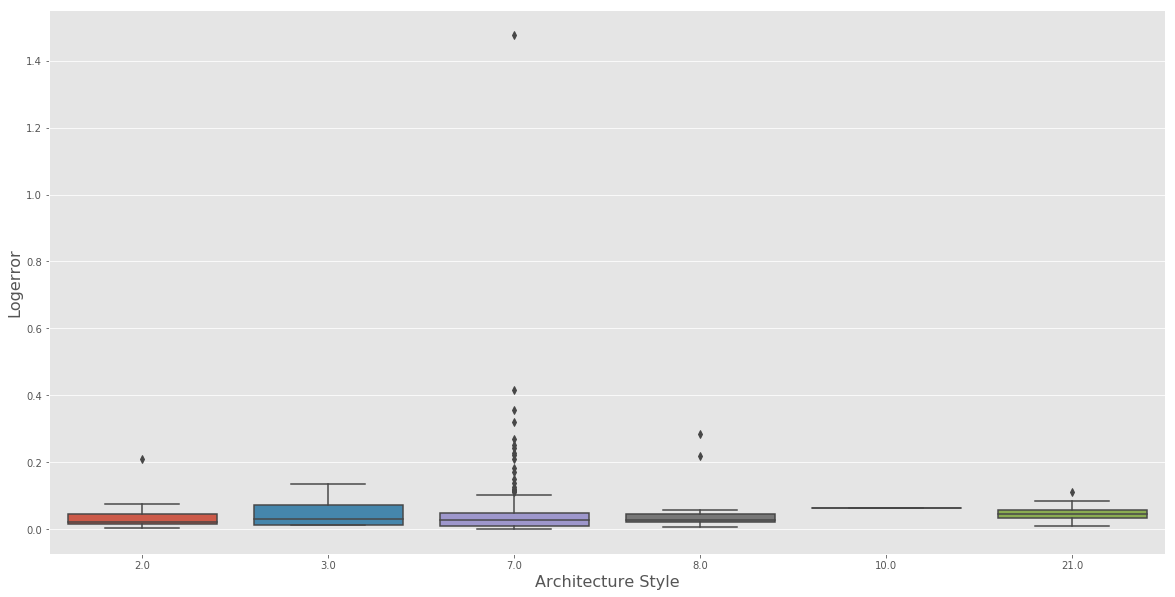

In [39]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_df,
            x='architecturalstyletypeid',
            y='abs_logerror')
plt.xlabel('Architecture Style', fontsize = 16)
plt.ylabel('Logerror', fontsize = 16)

Text(0,0.5,'Logerror')

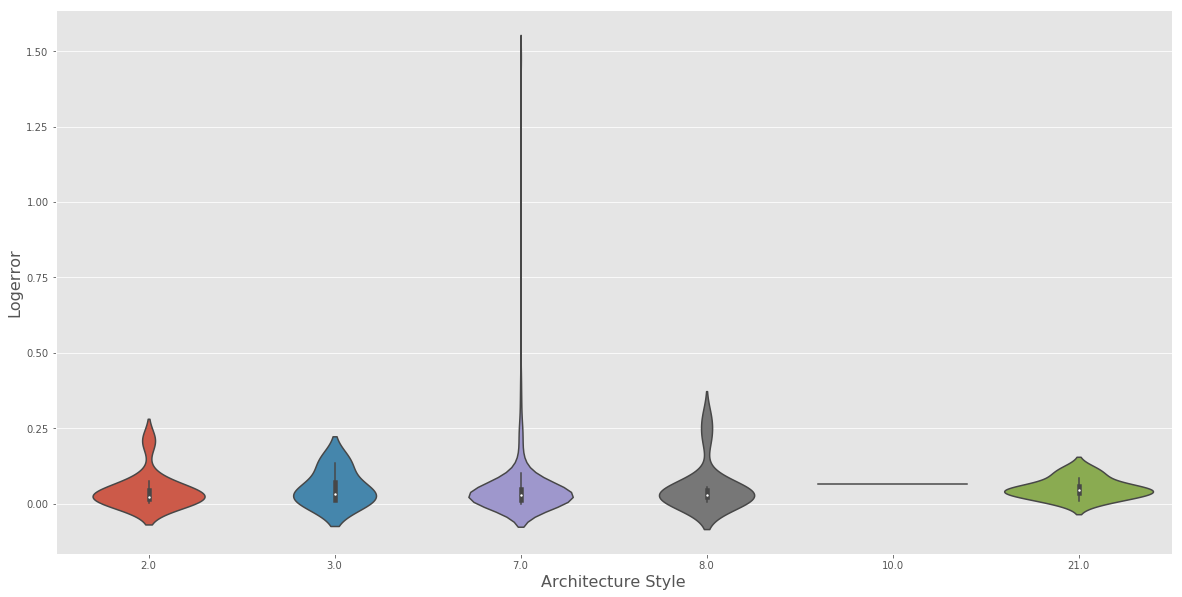

In [40]:
plt.figure(figsize=(20, 10))
sns.violinplot(data=train_df,
            x='architecturalstyletypeid',
            y='abs_logerror')
plt.xlabel('Architecture Style', fontsize = 16)
plt.ylabel('Logerror', fontsize = 16)

Zillow model is not ideal for architectural style 7, more time could be spent on that

Text(0,0.5,'Tax Value')

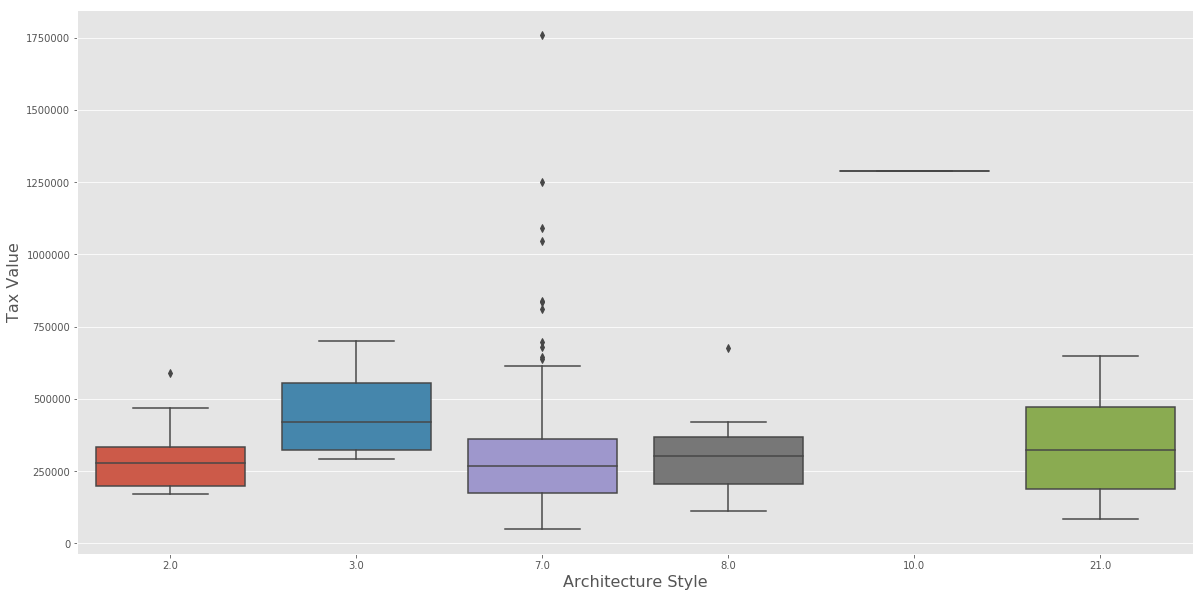

In [41]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=train_df,
            x='architecturalstyletypeid',
            y='taxvaluedollarcnt')
plt.xlabel('Architecture Style', fontsize = 16)
plt.ylabel('Tax Value', fontsize = 16)

Text(0,0.5,'Tax Value')

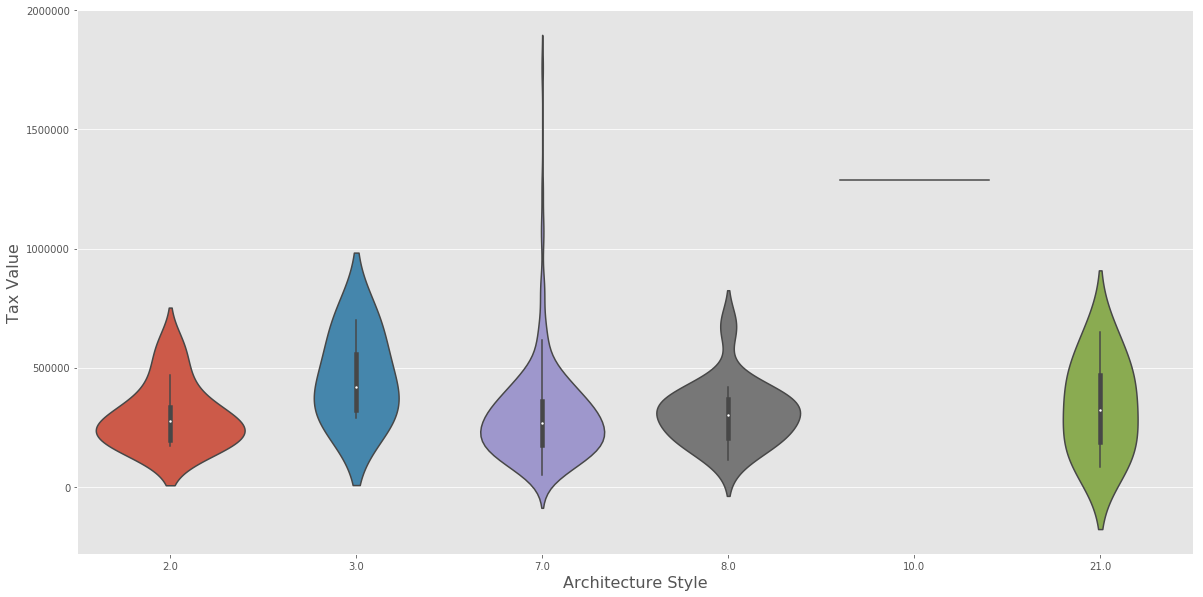

In [42]:
plt.figure(figsize=(20, 10))
sns.violinplot(data=train_df,
            x='architecturalstyletypeid',
            y='taxvaluedollarcnt')
plt.xlabel('Architecture Style', fontsize = 16)
plt.ylabel('Tax Value', fontsize = 16)

# Find Missing Values

In [43]:
train_df.shape

(90275, 61)

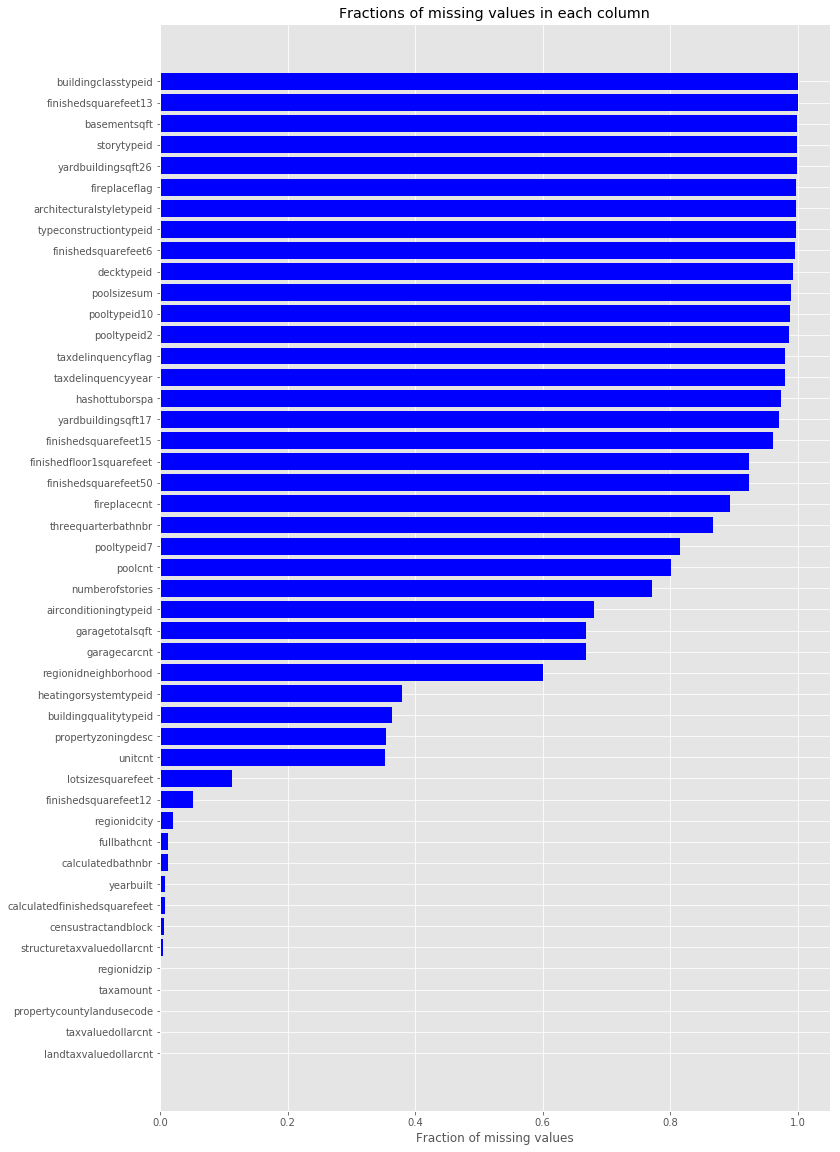

In [44]:
missing_value_df = train_df.isnull().sum(axis = 0).reset_index()
missing_value_df.columns = ['column_name', 'missing_count']
missing_value_df = missing_value_df.loc[missing_value_df['missing_count'] > 0]
missing_value_df = missing_value_df.sort_values(by = 'missing_count')

index = np.arange(missing_value_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,20))
rects = ax.barh(index, missing_value_df.missing_count.values / train_df.shape[0], color='blue')
ax.set_yticks(index)
ax.set_yticklabels(missing_value_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Fraction of missing values")
ax.set_title("Fractions of missing values in each column")
plt.show()

# Data Preprocessing

## Group Variables into different groups

In [45]:
cat_vars = list(train_df.dtypes[train_df.dtypes=='object'].index)
num_vars = list(train_df.dtypes[train_df.dtypes=='int64'].index) + list(train_df.dtypes[train_df.dtypes=='float64'].index)

id_var = 'id'
target_var = 'logerror'
num_vars.remove('parcelid')
num_vars.remove('logerror')
num_vars.remove('abs_logerror')
cat_vars.remove('transactiondate')

dt_vars=['transactiondate']

print("Categorical features:", cat_vars)
print("Numerical features:", num_vars)
print("Datetime features:", dt_vars)
print("ID: {}, target: {}" .format( id_var, target_var))

Categorical features: ['hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc', 'fireplaceflag', 'taxdelinquencyflag']
Numerical features: ['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt', 'num

## Create New Numerical Features

In [46]:
properties['finished_sq_ratio'] = properties[['calculatedfinishedsquarefeet','lotsizesquarefeet']].apply(
    lambda x : x[0]/x[1] if x[1] > 0 else -999999, axis = 1)

properties['taxvalue_per_sq'] = properties[['taxvaluedollarcnt','calculatedfinishedsquarefeet']].apply(
    lambda x : x[0]/x[1] if x[1] > 0 else -999999, axis = 1)

properties['structure_tax_ratio'] = properties[['structuretaxvaluedollarcnt','taxvaluedollarcnt']].apply(
    lambda x : x[0]/x[1] if x[1] > 0 else -999999, axis = 1)

properties['landtax_per_sq'] = properties[['landtaxvaluedollarcnt','lotsizesquarefeet']].apply(
    lambda x : x[0]/x[1] if x[1] > 0 else -999999, axis = 1)

properties['assessmentyear_to_builtyear']= properties[['assessmentyear','yearbuilt']].apply(
    lambda x : x[0]-x[1] if x[0] > 0 and x[1] > 0 else -999999, axis = 1)


num_to_num_vars = ['finished_sq_ratio','taxvalue_per_sq','structure_tax_ratio',
                   'landtax_per_sq','assessmentyear_to_builtyear']

### update train_df with new features

In [47]:
train_df = pd.merge(train_df, properties[num_to_num_vars + ['parcelid']], how='left', on='parcelid')

# Categorical features: Label Encoding


## Label Encoding only works for tree models, will need One Hot Encoding

In [48]:
LE = preprocessing.LabelEncoder()

LE_vars=[]
LE_map=dict()
for cat_var in cat_vars:
    print ("Label Encoding {}".format(cat_var))
    LE_var = cat_var + '_le'
    properties[LE_var] = LE.fit_transform(properties[cat_var].astype(str).fillna('none'))
    LE_vars.append(LE_var)
    LE_map[cat_var]=LE.classes_
    
print ("Label-encoded feaures: {}".format(LE_vars))

Label Encoding hashottuborspa
Label Encoding propertycountylandusecode
Label Encoding propertyzoningdesc
Label Encoding fireplaceflag
Label Encoding taxdelinquencyflag
Label-encoded feaures: ['hashottuborspa_le', 'propertycountylandusecode_le', 'propertyzoningdesc_le', 'fireplaceflag_le', 'taxdelinquencyflag_le']


# Categorical features: One Hot Encoding

In [49]:
OHE = preprocessing.OneHotEncoder(sparse=True)
start=time.time()
OHE.fit(properties[LE_vars])
OHE_sparse=OHE.transform(properties[LE_vars])
                                   
print ('One-hot-encoding finished in {} seconds'.format(time.time()-start))

OHE_vars = [var[:-3] + '_' + str(level).replace(' ','_')\
                for var in cat_vars for level in LE_map[var] ]

print ("OHE_sparse size :" ,OHE_sparse.shape)
print ("One-hot encoded catgorical feature samples : {}".format(OHE_vars[:100]))

One-hot-encoding finished in 10.530944108963013 seconds
OHE_sparse size : (2985217, 5886)
One-hot encoded catgorical feature samples : ['hashottubor_True', 'hashottubor_nan', 'propertycountylandusec_0', 'propertycountylandusec_010', 'propertycountylandusec_0100', 'propertycountylandusec_0101', 'propertycountylandusec_0102', 'propertycountylandusec_0103', 'propertycountylandusec_0104', 'propertycountylandusec_0105', 'propertycountylandusec_0106', 'propertycountylandusec_0108', 'propertycountylandusec_0109', 'propertycountylandusec_010C', 'propertycountylandusec_010D', 'propertycountylandusec_010E', 'propertycountylandusec_010F', 'propertycountylandusec_010G', 'propertycountylandusec_010H', 'propertycountylandusec_010L', 'propertycountylandusec_010M', 'propertycountylandusec_010T', 'propertycountylandusec_010V', 'propertycountylandusec_010X', 'propertycountylandusec_010Y', 'propertycountylandusec_0110', 'propertycountylandusec_0111', 'propertycountylandusec_0113', 'propertycountylandusec

# Modeling

In [50]:
# start with minimum features
train_df = train.merge(properties, how='left', on='parcelid')

In [51]:
full_vars = num_vars + LE_vars 
train_x = train_df[full_vars]
train_y = train_df['logerror'].values.astype(np.float32)

test_x = properties[full_vars]

# xgboost params
xgb_params = {
    'eta': 0.05,
    'max_depth': 4,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'silent': 1,
    'seed': 1234
}

dtrain = xgb.DMatrix(train_x, train_y)
dtest = xgb.DMatrix(test_x)

# cross-validation
cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   nfold=5,
                   num_boost_round=10000,
                   early_stopping_rounds=50,
                   verbose_eval=10, 
                   show_stdv=False,
                   seed = 1234
                  )

## best score and best round
best_iteration = len(cv_result)
best_score = cv_result['test-mae-mean'].min()
print("Best score {}, best iteration {}".format(best_score,best_iteration))


[0]	train-mae:0.472892	test-mae:0.472903
[10]	train-mae:0.291914	test-mae:0.292041
[20]	train-mae:0.18733	test-mae:0.187564
[30]	train-mae:0.128449	test-mae:0.128782
[40]	train-mae:0.0967488	test-mae:0.0971616
[50]	train-mae:0.0808742	test-mae:0.081373
[60]	train-mae:0.073532	test-mae:0.074115
[70]	train-mae:0.0702526	test-mae:0.0709188
[80]	train-mae:0.0687922	test-mae:0.0695242
[90]	train-mae:0.0680946	test-mae:0.0688938
[100]	train-mae:0.0677446	test-mae:0.068603
[110]	train-mae:0.0675466	test-mae:0.0684688
[120]	train-mae:0.0674242	test-mae:0.0684076
[130]	train-mae:0.0673406	test-mae:0.0683862
[140]	train-mae:0.067275	test-mae:0.0683742
[150]	train-mae:0.0672244	test-mae:0.068377
[160]	train-mae:0.0671776	test-mae:0.0683938
[170]	train-mae:0.067138	test-mae:0.0684228
[180]	train-mae:0.0671006	test-mae:0.0684396
[190]	train-mae:0.067062	test-mae:0.068456
Best score 0.0683696, best iteration 145


In [52]:
model = xgb.train(dict(xgb_params, silent = 1), dtrain, num_boost_round = best_iteration)
pred = model.predict(dtest)
y_pred=[]

for i,predict in enumerate(pred):
    y_pred.append(str(round(predict,4)))
y_pred=np.array(y_pred)

output = pd.DataFrame({'ParcelId': properties['parcelid'].astype(np.int32),
        '201610': y_pred, '201611': y_pred, '201612': y_pred,
        '201710': y_pred, '201711': y_pred, '201712': y_pred})
# set col 'ParceID' to first col
cols = output.columns.tolist()
cols = cols[-1:] + cols[:-1]
output = output[cols]
from datetime import datetime
output.to_csv('outputs/sub{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index = False)

print ("Finished")

Finished


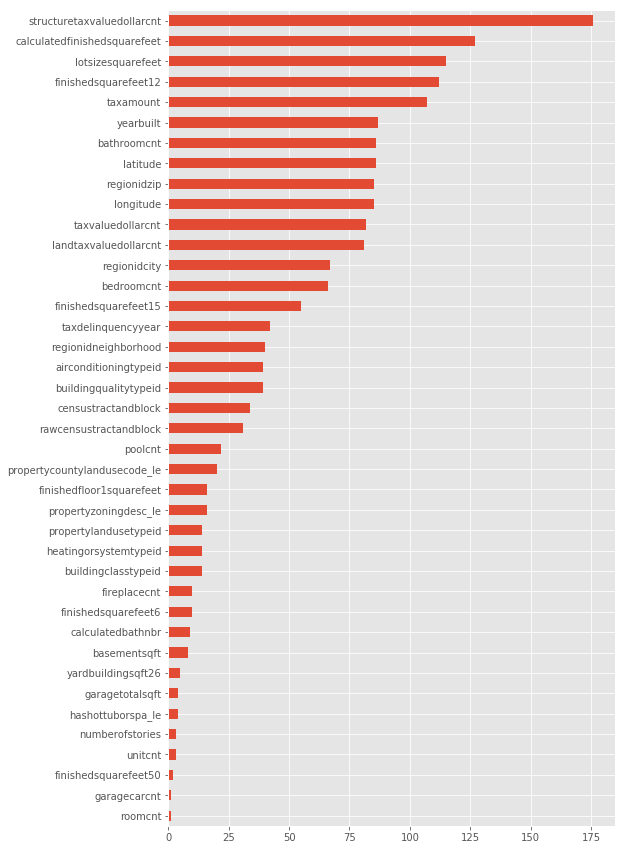

In [53]:
feature_imporantce = pd.Series(model.get_fscore()).sort_values(ascending = True)
feature_imporantce.plot.barh(x='feature_name',figsize=(8,15))

In [54]:
full_vars = num_vars + LE_vars + num_to_num_vars
train_x = train_df[full_vars]
train_y = train_df['logerror'].values.astype(np.float32)

test_x = properties[full_vars]

# xgboost params
xgb_params = {
    'eta': 0.05,
    'max_depth': 4,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'silent': 1,
    'seed': 1234
}

dtrain = xgb.DMatrix(train_x, train_y)
dtest = xgb.DMatrix(test_x)

# cross-validation
cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   nfold=5,
                   num_boost_round=10000,
                   early_stopping_rounds=50,
                   verbose_eval=10, 
                   show_stdv=False,
                   seed = 1234
                  )

## best score and best round
best_iteration = len(cv_result)
best_score = cv_result['test-mae-mean'].min()
print("Best score {}, best iteration {}".format(best_score,best_iteration))

[0]	train-mae:0.472892	test-mae:0.472903
[10]	train-mae:0.291909	test-mae:0.292048
[20]	train-mae:0.187326	test-mae:0.187571
[30]	train-mae:0.128443	test-mae:0.128781
[40]	train-mae:0.0967506	test-mae:0.09718
[50]	train-mae:0.0808814	test-mae:0.0813918
[60]	train-mae:0.0735342	test-mae:0.0741218
[70]	train-mae:0.0702658	test-mae:0.070941
[80]	train-mae:0.068802	test-mae:0.069555
[90]	train-mae:0.0681026	test-mae:0.0689354
[100]	train-mae:0.0677424	test-mae:0.0686488
[110]	train-mae:0.0675388	test-mae:0.068518
[120]	train-mae:0.0674132	test-mae:0.068459
[130]	train-mae:0.0673204	test-mae:0.0684322
[140]	train-mae:0.067254	test-mae:0.068427
[150]	train-mae:0.0671966	test-mae:0.0684284
[160]	train-mae:0.0671468	test-mae:0.0684358
[170]	train-mae:0.0670958	test-mae:0.0684464
[180]	train-mae:0.067057	test-mae:0.0684602
[190]	train-mae:0.0670136	test-mae:0.0684768
Best score 0.0684202, best iteration 146


In [55]:
model = xgb.train(dict(xgb_params, silent = 1), dtrain, num_boost_round = best_iteration)
pred = model.predict(dtest)
y_pred=[]

for i,predict in enumerate(pred):
    y_pred.append(str(round(predict,4)))
y_pred=np.array(y_pred)

output = pd.DataFrame({'ParcelId': properties['parcelid'].astype(np.int32),
        '201610': y_pred, '201611': y_pred, '201612': y_pred,
        '201710': y_pred, '201711': y_pred, '201712': y_pred})
# set col 'ParceID' to first col
cols = output.columns.tolist()
cols = cols[-1:] + cols[:-1]
output = output[cols]
from datetime import datetime
output.to_csv('outputs/sub_with_engineered_features{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)

print ("Finished")

Finished


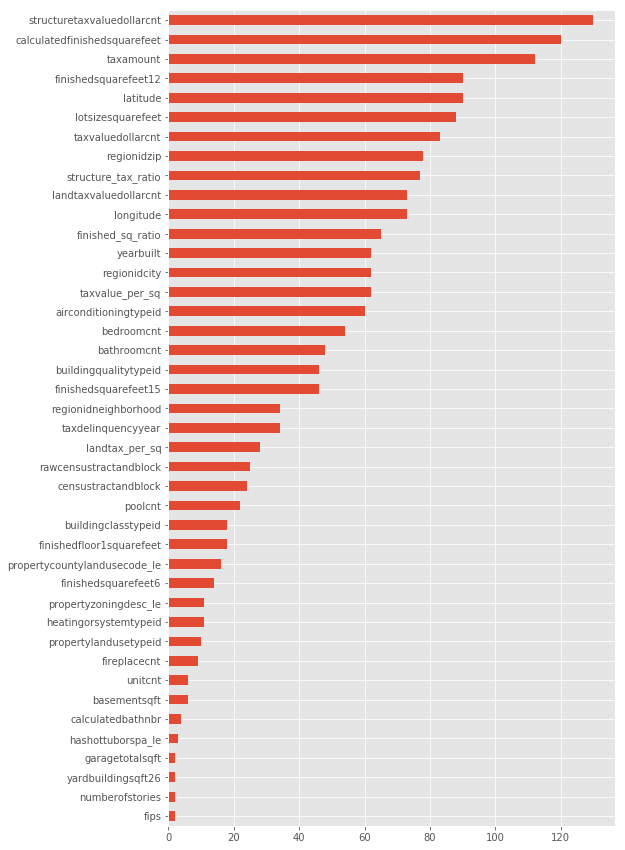

In [56]:
feature_imporantce = pd.Series(model.get_fscore()).sort_values(ascending = True)
feature_imporantce.plot.barh(x='feature_name',figsize=(8,15))

# XGBoost  tuning
## Manuanl Tuning

In [57]:
full_vars = num_vars + LE_vars
train_df = pd.merge(train, properties,
                     how='left', on='parcelid')

train_x = train_df[full_vars]
train_y = train_df['logerror'].values.astype(np.float32)

xgtrain = xgb.DMatrix(train_x, train_y)
xgtest = xgb.DMatrix(properties[full_vars])

### max_depth

In [ ]:
%%time
xgb_scores = pd.DataFrame()
scores = []

for max_depth in [3,4,5,6,7,8,9,10]:

    params = dict()
    params['objective'] = 'reg:linear'
    params['eta'] = 0.1
    params['max_depth'] = max_depth
    params['min_child_weight'] = 1
    params['subsample'] = 1
    params['colsample_bytree'] = 1
    params['gamma'] = 0
    params['seed']=1234

    cv_results = xgb.cv(params, xgtrain,
                        num_boost_round=1000000,
                        nfold=5,
                        metrics={'mae'},
                        seed=1234,
                        callbacks=[xgb.callback.early_stop(50)],
                        verbose_eval=50)
    best_iteration = len(cv_results)
    best_score = cv_results['test-mae-mean'].min()
    print (max_depth,best_score,best_iteration)
    scores.append([best_score,params['eta'],params['max_depth'],params['min_child_weight'],
                      params['colsample_bytree'],params['subsample'],params['gamma'],best_iteration])
xgb_scores = pd.concat([xgb_scores, pd.DataFrame(scores,columns=['score','eta','max_depth','min_child_weight',
                                   'colsample_bytree','subsample','gamma','best_iteration'])])    
best_max_depth = int(pd.DataFrame(scores,columns=['score','eta','max_depth','min_child_weight',
                                   'colsample_bytree','subsample','gamma','best_iteration']).sort_values(by='score',ascending=True)['max_depth'].values[0])
print ('best max_depth is', best_max_depth)

### min_child_weight

In [ ]:
%%time
xgb_scores = pd.DataFrame()
scores = []

for min_child_weight in [1,3,10,30,50,75,100]:

    params = dict()
    params['objective'] = 'reg:linear'
    params['eta'] = 0.1
    params['max_depth'] = best_max_depth
    params['min_child_weight'] = min_child_weight
    params['subsample'] = 1
    params['colsample_bytree'] = 1
    params['gamma'] = 0
    params['seed']=1234

    cv_results = xgb.cv(params, xgtrain,
                        num_boost_round=1000000,
                        nfold=5,
                        metrics={'mae'},
                        seed=1234,
                        callbacks=[xgb.callback.early_stop(50)],
                        verbose_eval=50)
    best_iteration = len(cv_results)
    best_score = cv_results['test-mae-mean'].min()
    print (min_child_weight,best_score,best_iteration)
    scores.append([best_score,params['eta'],params['max_depth'],params['min_child_weight'],
                      params['colsample_bytree'],params['subsample'],params['gamma'],best_iteration])
xgb_scores = pd.concat([xgb_scores, pd.DataFrame(scores,columns=['score','eta','max_depth','min_child_weight',
                                   'colsample_bytree','subsample','gamma','best_iteration'])])    
best_min_child_weight = int(pd.DataFrame(scores,columns=['score','eta','max_depth','min_child_weight',
                                   'colsample_bytree','subsample','gamma','best_iteration']).sort_values(by='score',ascending=True)['min_child_weight'].values[0])
print ('best min_child_weight is', best_min_child_weight)

### colsample_bytree

In [ ]:
%%time
xgb_scores = pd.DataFrame()
scores = []

for colsample_bytree in [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:

    params = dict()
    params['objective'] = 'reg:linear'
    params['eta'] = 0.1
    params['max_depth'] = best_max_depth
    params['min_child_weight'] = best_min_child_weight
    params['colsample_bytree'] = colsample_bytree
    params['subsample'] = 1
    params['gamma'] = 0
    params['seed']=1234

    cv_results = xgb.cv(params, xgtrain,
                        num_boost_round=1000000,
                        nfold=5,
                        metrics={'mae'},
                        seed=1234,
                        callbacks=[xgb.callback.early_stop(50)],
                        verbose_eval=50)
    best_iteration = len(cv_results)
    best_score = cv_results['test-mae-mean'].min()
    print (colsample_bytree,best_score,best_iteration)
    scores.append([best_score,params['eta'],params['max_depth'],params['min_child_weight'],
                      params['colsample_bytree'],params['subsample'],params['gamma'],best_iteration])
xgb_scores = pd.concat([xgb_scores, pd.DataFrame(scores,columns=['score','eta','max_depth','min_child_weight',
                                   'colsample_bytree','subsample','gamma','best_iteration'])])    
best_colsample_bytree = pd.DataFrame(scores,columns=['score','eta','max_depth','min_child_weight',
                                   'colsample_bytree','subsample','gamma','best_iteration']).\
                sort_values(by='score',ascending=True)['colsample_bytree'].values[0]
print ('best colsample_bytree is', best_colsample_bytree)

### subsample

In [ ]:
%%time
xgb_scores = pd.DataFrame()
scores = []

for subsample in [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:

    params = dict()
    params['objective'] = 'reg:linear'
    params['eta'] = 0.1
    params['max_depth'] = best_max_depth
    params['min_child_weight'] = best_min_child_weight
    params['colsample_bytree'] = best_colsample_bytree
    params['subsample'] = subsample
    params['gamma'] = 0
    params['seed']=1234

    cv_results = xgb.cv(params, xgtrain,
                        num_boost_round=1000000,
                        nfold=5,
                        metrics={'mae'},
                        seed=1234,
                        callbacks=[xgb.callback.early_stop(50)],
                        verbose_eval=50)
    best_iteration = len(cv_results)
    best_score = cv_results['test-mae-mean'].min()
    print (subsample,best_score,best_iteration)
    scores.append([best_score,params['eta'],params['max_depth'],params['min_child_weight'],
                      params['colsample_bytree'],params['subsample'],params['gamma'],best_iteration])
xgb_scores = pd.concat([xgb_scores, pd.DataFrame(scores,columns=['score','eta','max_depth','min_child_weight',
                                   'colsample_bytree','subsample','gamma','best_iteration'])])    
best_subsample = pd.DataFrame(scores,columns=['score','eta','max_depth','min_child_weight',
                                   'colsample_bytree','subsample','gamma','best_iteration']).\
                sort_values(by='score',ascending=True)['subsample'].values[0]
print ('best subsample is', best_subsample)

### gamma

In [ ]:
%%time
xgb_scores = pd.DataFrame()
scores = []

for gamma in [0,0.1,0.2,0.5,1,1.25,1.5,1.75,2]:

    params = dict()
    params['objective'] = 'reg:linear'
    params['eta'] = 0.1
    params['max_depth'] = best_max_depth
    params['min_child_weight'] = best_min_child_weight
    params['colsample_bytree'] = best_colsample_bytree
    params['subsample'] = best_subsample
    params['gamma'] = gamma
    params['seed']=1234

    cv_results = xgb.cv(params, xgtrain,
                        num_boost_round=1000000,
                        nfold=5,
                        metrics={'mae'},
                        seed=1234,
                        callbacks=[xgb.callback.early_stop(50)],
                        verbose_eval=50)
    best_iteration = len(cv_results)
    best_score = cv_results['test-mae-mean'].min()
    print (gamma,best_score,best_iteration)
    scores.append([best_score,params['eta'],params['max_depth'],params['min_child_weight'],
                      params['colsample_bytree'],params['subsample'],params['gamma'],best_iteration])
xgb_scores = pd.concat([xgb_scores, pd.DataFrame(scores,columns=['score','eta','max_depth','min_child_weight',
                                   'colsample_bytree','subsample','gamma','best_iteration'])])    
best_gamma = pd.DataFrame(scores,columns=['score','eta','max_depth','min_child_weight',
                                   'colsample_bytree','subsample','gamma','best_iteration']).\
                    sort_values(by='score',ascending=True)['gamma'].values[0]
print ('best gamma is', best_subsample)

### XGBoost model training with manually tuned parameters

In [63]:
params = dict()
params['objective'] = 'reg:linear'
params['eta'] = 0.1
params['max_depth'] = best_max_depth
params['min_child_weight'] = best_min_child_weight
params['colsample_bytree'] = best_colsample_bytree
params['subsample'] = best_subsample
params['gamma'] = best_gamma
params['seed']=1234



model = xgb.train(params, xgtrain, num_boost_round=best_iteration)
pred = model.predict(xgtest)
y_pred=[]

for i,predict in enumerate(pred):
    y_pred.append(str(round(predict,4)))
y_pred=np.array(y_pred)

output = pd.DataFrame({'ParcelId': properties['parcelid'].astype(np.int32),
        '201610': y_pred, '201611': y_pred, '201612': y_pred,
        '201710': y_pred, '201711': y_pred, '201712': y_pred})
# set col 'ParceID' to first col
cols = output.columns.tolist()
cols = cols[-1:] + cols[:-1]
output = output[cols]
from datetime import datetime
output.to_csv('outputs/sub_manually_tuned{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)

print ("Finished")

Finished


late submission score: 0.0651877

## Automated tuning

In [64]:
from bayes_opt import BayesianOptimization

In [ ]:

def xgb_evaluate(min_child_weight,
                 colsample_bytree,
                 max_depth,
                 subsample,
                 gamma):
    params = dict()
    params['objective'] = 'reg:linear'
    params['eta'] = 0.1
    params['max_depth'] = int(max_depth )   
    params['min_child_weight'] = int(min_child_weight)
    params['colsample_bytree'] = colsample_bytree
    params['subsample'] = subsample
    params['gamma'] = gamma
    params['verbose_eval'] = True    


    cv_result = xgb.cv(params, xgtrain,
                       num_boost_round=100000,
                       nfold=5,
                       metrics={'mae'},
                       seed=1234,
                       callbacks=[xgb.callback.early_stop(50)])

    return -cv_result['test-mae-mean'].min()


xgb_BO = BayesianOptimization(xgb_evaluate, 
                             {'max_depth': (2, 5),
                              'min_child_weight': (0, 100),
                              'colsample_bytree': (0.1, 1),
                              'subsample': (0.7, 1),
                              'gamma': (0, 2)
                             }
                            )

xgb_BO.maximize(init_points=8, n_iter=40)

In [66]:
BO_scores = pd.DataFrame(xgb_BO.res['all']['params'])
BO_scores['score'] = pd.DataFrame(xgb_BO.res['all']['values'])
BO_scores = BO_scores.sort_values(by='score',ascending=False).reset_index()
BO_scores.head()

,index,colsample_bytree,gamma,max_depth,min_child_weight,subsample,score
0,15,0.984900,1.083233,3.655609,75.265910,0.968011,-0.068092
1,26,0.755971,0.988636,2.062704,85.667157,0.952807,-0.068096
2,24,0.694530,1.439911,4.024768,96.036738,0.917371,-0.068097
3,14,0.981200,0.557246,2.459576,94.951903,0.973471,-0.068097
4,39,0.448472,0.966811,3.814519,52.327947,0.879268,-0.068106


In [67]:
best_params = dict()

best_params['max_depth'] = int(BO_scores['max_depth'][0])
best_params['min_child_weight'] = int(BO_scores['min_child_weight'][0])
best_params['colsample_bytree'] = BO_scores['colsample_bytree'][0]
best_params['subsample'] = BO_scores['subsample'][0]
best_params['gamma'] = BO_scores['gamma'][0]

best_params['objective'] = 'reg:linear'
best_params['eta'] = 0.1
best_params['seed'] = 1234

print (best_params)

{'max_depth': 3, 'min_child_weight': 75, 'colsample_bytree': 0.98490035892862127, 'subsample': 0.96801084549197536, 'gamma': 1.0832329453585052, 'objective': 'reg:linear', 'eta': 0.1, 'seed': 1234}


### Retrain the models with auto-tuned parameters

In [68]:
best_params = dict()

best_params['max_depth'] = int(BO_scores['max_depth'][0])
best_params['min_child_weight'] = int(BO_scores['min_child_weight'][0])
best_params['colsample_bytree'] = BO_scores['colsample_bytree'][0]
best_params['subsample'] = BO_scores['subsample'][0]
best_params['gamma'] = BO_scores['gamma'][0]

best_params['objective'] = 'reg:linear'
best_params['eta'] = 0.1
best_params['seed'] = 1234


cv_result = xgb.cv(best_params, xgtrain,
                   num_boost_round=100000,
                   nfold=5,
                   metrics={'mae'},
                   seed=1234,
                   callbacks=[xgb.callback.early_stop(50)], 
                  verbose_eval=50)

best_iteration = len(cv_result)
best_score = cv_result['test-mae-mean'].min()

print("Best score {}, best iteration {}".format(best_score,best_iteration))


Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 50 rounds.
[0]	train-mae:0.448979+0.000198031	test-mae:0.448977+0.000888435
[50]	train-mae:0.0682974+0.000151489	test-mae:0.068375+0.000664478
[100]	train-mae:0.0679896+0.000157199	test-mae:0.0680866+0.000666072
[150]	train-mae:0.0679768+0.000158928	test-mae:0.068095+0.000658162
Stopping. Best iteration:
[116]	train-mae:0.067978+0.000156438	test-mae:0.0680822+0.000663852

Best score 0.06808220000000001, best iteration 117


In [77]:
xgtrain = xgb.DMatrix(train_x, train_y)
xgtest = xgb.DMatrix(properties[full_vars])

In [85]:
model = xgb.train(best_params, xgtrain, num_boost_round=best_iteration)
pred = model.predict(xgtest)
y_pred=[]

for i,predict in enumerate(pred):
    y_pred.append(str(round(predict,4)))
y_pred=np.array(y_pred)

output = pd.DataFrame({'ParcelId': properties['parcelid'].astype(np.int32),
        '201610': y_pred, '201611': y_pred, '201612': y_pred,
        '201710': y_pred, '201711': y_pred, '201712': y_pred})
# set col 'ParceID' to first col
cols = output.columns.tolist()
cols = cols[-1:] + cols[:-1]
output = output[cols]
from datetime import datetime
output.to_csv('outputs/sub_auto_tuned{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)

print ("Finished")

Finished


### Train another model with tuned parameters and smaller learning rate

In [86]:
best_params = dict()

best_params['max_depth'] = int(BO_scores['max_depth'][0])
best_params['min_child_weight'] = int(BO_scores['min_child_weight'][0])
best_params['colsample_bytree'] = BO_scores['colsample_bytree'][0]
best_params['subsample'] = BO_scores['subsample'][0]
best_params['gamma'] = BO_scores['gamma'][0]

best_params['objective'] = 'reg:linear'
best_params['eta'] = 0.01
best_params['seed'] = 1234


cv_result = xgb.cv(best_params, xgtrain,
                   num_boost_round=100000,
                   nfold=5,
                   metrics={'mae'},
                   seed=1234,
                   callbacks=[xgb.callback.early_stop(200)], # we need to increase stopping rounds too
                  verbose_eval=50)

best_iteration = len(cv_result)
best_score = cv_result['test-mae-mean'].min()
print("Best score {}, best iteration {}".format(best_score,best_iteration))

Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 200 rounds.
[0]	train-mae:0.492086+0.000209872	test-mae:0.492085+0.000849247
[50]	train-mae:0.306137+0.000192914	test-mae:0.306151+0.00103484
[100]	train-mae:0.197282+0.000198753	test-mae:0.197314+0.00113984
[150]	train-mae:0.135091+0.000167852	test-mae:0.135138+0.00106633
[200]	train-mae:0.10095+0.000142345	test-mae:0.101001+0.00094142
[250]	train-mae:0.0833966+0.000136008	test-mae:0.083457+0.000840589
[300]	train-mae:0.0750582+0.000141991	test-mae:0.0751202+0.00076375
[350]	train-mae:0.0712836+0.000142002	test-mae:0.07135+0.000727126
[400]	train-mae:0.0695962+0.000145117	test-mae:0.0696616+0.000706349
[450]	train-mae:0.0688216+0.000149851	test-mae:0.0688898+0.000693996
[500]	train-mae:0.0684458+0.000151233	test-mae:0.0685166+0.000685523
[550]	train-mae:0.0682542+0.000152224	test-mae:0.0683272+0.000680814
[600]	train-mae:0.068152+0.000151859	test-mae:0.0682

In [87]:
model = xgb.train(best_params, xgtrain, num_boost_round=best_iteration)
pred = model.predict(xgtest)
y_pred=[]

for i,predict in enumerate(pred):
    y_pred.append(str(round(predict,4)))
y_pred=np.array(y_pred)

output = pd.DataFrame({'ParcelId': properties['parcelid'].astype(np.int32),
        '201610': y_pred, '201611': y_pred, '201612': y_pred,
        '201710': y_pred, '201711': y_pred, '201712': y_pred})
# set col 'ParceID' to first col
cols = output.columns.tolist()
cols = cols[-1:] + cols[:-1]
output = output[cols]
from datetime import datetime
output.to_csv('outputs/sub_auto_tuned_small_eta{}.csv'.format(datetime.now().strftime('%Y%m%d_%H%M%S')), index=False)

print ("Finished")

Finished


late submission score: 0.0649204